In [71]:
%matplotlib inline

# scientific packages
import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import relativedelta
sns.set();

In [72]:
df = pd.read_csv('C:\\Users\\krish\\Downloads\\uber\\sTEF.csv', parse_dates=[4,5,6,10])
df.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,2016-01-02,NaT,NaT,NaN,NaN,NaN,NaT
1,2,Strark,windows,Paid,2016-01-21,NaT,NaT,NaN,NaN,NaN,NaT
2,3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT,NaN,NaN,NaN,NaT
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016,2016-02-03
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016,NaT


In [73]:
#total count
len(df['id'].unique())

54681

In [74]:
# # nbr of null values in each column
for col in df:
    print (col, pd.isnull(df[col]).sum())

id 0
city_name 0
signup_os 6857
signup_channel 0
signup_date 0
bgc_date 21785
vehicle_added_date 41547
vehicle_make 41458
vehicle_model 41458
vehicle_year 41458
first_completed_date 48544


In [75]:
df['activated_y'] = np.where(df['first_completed_date'].isnull(), 0.0, 1.0)
df.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,activated_y
0,1,Strark,ios web,Paid,2016-01-02,NaT,NaT,NaN,NaN,NaN,NaT,0
1,2,Strark,windows,Paid,2016-01-21,NaT,NaT,NaN,NaN,NaN,NaT,0
2,3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT,NaN,NaN,NaN,NaT,0
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016,2016-02-03,1
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016,NaT,0


In [76]:
len(df[(df['bgc_date'].isnull()) & (df['vehicle_added_date'].notnull()) & (df['activated_y'] == 1.0) ])

0

In [77]:
len(df[(df['bgc_date'].isnull()) & (df['vehicle_added_date'].notnull()) & (df['activated_y'] == 0.0) ])

255

In [78]:
len(df[(df['bgc_date'].isnull()) & (df['vehicle_added_date'].notnull())])

# adding vehicle without bgc does not makes business sense. So these records can be removed. 

255

In [79]:
df = df.drop(df[((df['bgc_date'].isnull()) & (df['vehicle_added_date'].notnull()))].index)

In [80]:
#total count
len(df['id'].unique())

54426

In [81]:
# # nbr of null values in each column
for col in df:
    print (col, pd.isnull(df[col]).sum())

id 0
city_name 0
signup_os 6832
signup_channel 0
signup_date 0
bgc_date 21530
vehicle_added_date 41547
vehicle_make 41458
vehicle_model 41458
vehicle_year 41458
first_completed_date 48289
activated_y 0


# Activation Percentage

In [82]:
print ("Tot activated :" + str(df.activated_y.sum()))
print ("Tot signup :" + str(df['activated_y'].count()))
print ("Percentage activated :"  + str(df.activated_y.sum() *100/df['activated_y'].count()))

Tot activated :6137.0
Tot signup :54426
Percentage activated :11.2758608018


# CITY NAME

In [83]:
df['city_name'].unique()

array(['Strark', 'Wrouver', 'Berton'], dtype=object)

In [84]:
df_city_name_dist = df.groupby("city_name").agg({"id": pd.Series.nunique})
df_city_name_dist.rename(columns={"id": "cnt"}, inplace=True)
df_city_name_dist["perc_dist"] = df_city_name_dist["cnt"] *100/df_city_name_dist["cnt"].sum()
df_city_name_dist

,cnt,perc_dist
city_name,,
Berton,20029,36.800426
Strark,29422,54.058722
Wrouver,4975,9.140852


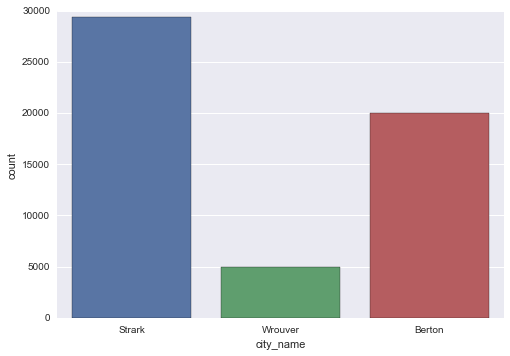

In [85]:
sns.countplot(x="city_name", data=df);

In [86]:
df_city_activated = df.groupby(["city_name","activated_y"]).agg({"id": pd.Series.nunique})
df_city_activated.rename(columns={"id": "cnt"}, inplace=True)
df_city_activated.head()

cnt
city_name activated_y       
Berton    0            17592
          1             2437
Strark    0            26183
          1             3239
Wrouver   0             4514

In [87]:
df_city = df.groupby(["city_name"]).agg({"activated_y": "count"})
df_city.rename(columns={"activated_y": "cnt"}, inplace=True)
df_city.head()
df_city_activated.div(df_city, level='city_name') * 100

cnt
city_name activated_y           
Berton    0            87.832643
          1            12.167357
Strark    0            88.991231
          1            11.008769
Wrouver   0            90.733668
          1             9.266332

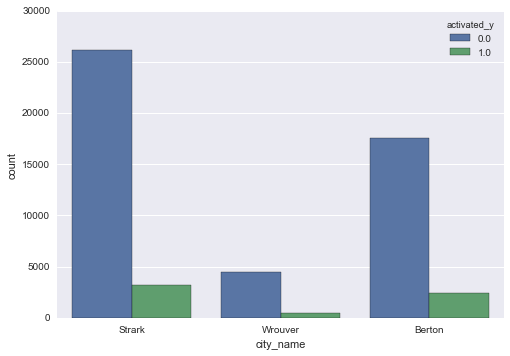

In [88]:
sns.countplot(x="city_name", hue="activated_y", data=df);

# SIGNUP CHANNEL

In [89]:
df['signup_channel'].unique()

array(['Paid', 'Organic', 'Referral'], dtype=object)

In [90]:
df_signup_channel_dist = df.groupby("signup_channel").agg({"id": pd.Series.nunique})
df_signup_channel_dist.rename(columns={"id": "cnt"}, inplace=True)
df_signup_channel_dist["perc_dist"] = df_signup_channel_dist["cnt"] *100/df_signup_channel_dist["cnt"].sum()
df_signup_channel_dist


,cnt,perc_dist
signup_channel,,
Organic,13354,24.536067
Paid,23852,43.824643
Referral,17220,31.639290


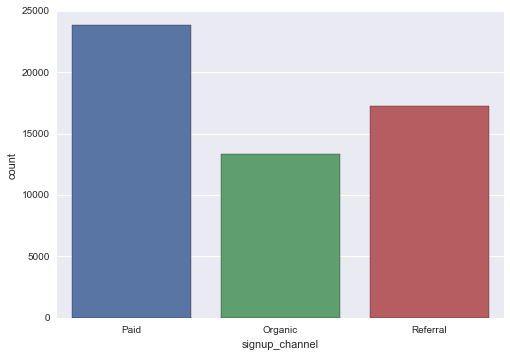

In [91]:
sns.countplot(x="signup_channel", data=df);

In [92]:
df_signup_activated = df.groupby(["signup_channel","activated_y"]).agg({"id": pd.Series.nunique})
df_signup_activated.rename(columns={"id": "cnt"}, inplace=True)
df_signup_activated

cnt
signup_channel activated_y       
Organic        0            12144
               1             1210
Paid           0            22370
               1             1482
Referral       0            13775
               1             3445

In [93]:
df_signup = df.groupby(["signup_channel"]).agg({"activated_y": "count"})
df_signup.rename(columns={"activated_y": "pct"}, inplace=True)
df_signup.head()
df_signup_activated.div(df_signup, level='signup_channel') * 100


cnt
signup_channel activated_y           
Organic        0            90.939044
               1             9.060956
Paid           0            93.786685
               1             6.213315
Referral       0            79.994193
               1            20.005807

# Findings 
    signup_channel: referral has better activation rate

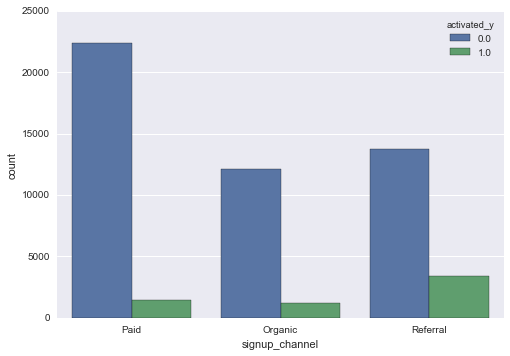

In [94]:
sns.countplot(x="signup_channel", hue="activated_y", data=df);

# Dates

In [95]:
print (df.signup_date.min())
print (df.signup_date.max())

# df['signup_date'].unique()

2016-01-01 00:00:00
2016-01-30 00:00:00


In [96]:
print (df.first_completed_date.dropna().min())
print (df.first_completed_date.dropna().max())

2016-01-04 00:00:00
2016-02-29 00:00:00


# Vechile Year

In [97]:
print (df.vehicle_year.dropna().min())
print (df.vehicle_year.dropna().max())
print (df['vehicle_year'].unique())

0.0
2017.0
[   nan  2016.  2006.  2014.  2015.  2010.  2012.  2011.  2007.  2013.
  2008.  2005.  2001.  2009.  2004.  2002.  2003.  2017.  2000.  1999.
  1996.  1997.  1998.  1995.     0.]


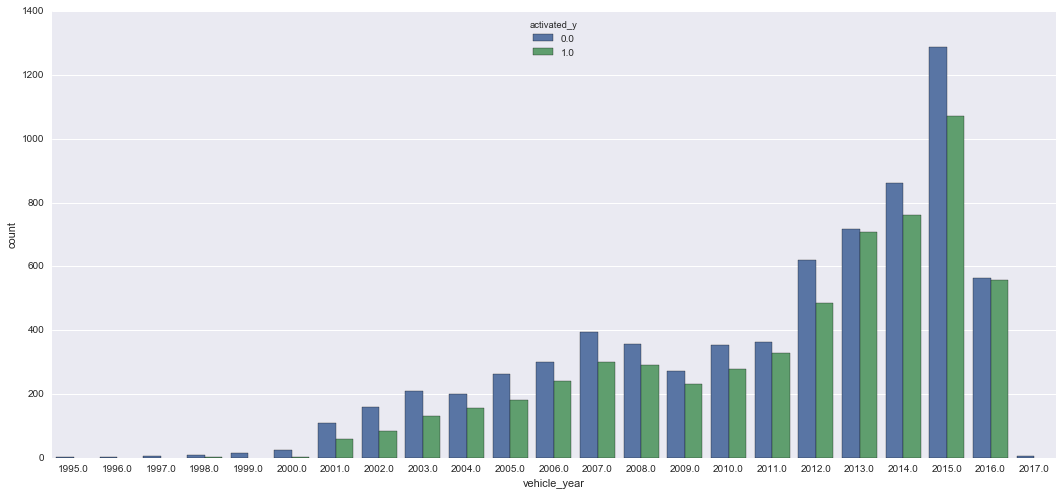

In [98]:
df_rmv_vy_0 = df[df["vehicle_year"] > 0]
plt.figure(figsize=(18,8))
sns.countplot(x="vehicle_year", hue="activated_y", data=df_rmv_vy_0)

# Findings:
    As the vehicle year is relatively new the signup & ativation rates are increasing (exception 2008 - 2010 - recession can be a cause )

In [99]:
df_vehicle_year_activated = df_rmv_vy_0.groupby(["vehicle_year","activated_y"]).agg({"id": pd.Series.nunique})
df_vehicle_year_activated.rename(columns={"id": "cnt"}, inplace=True)
df_vehicle_year_activated.head()

cnt
vehicle_year activated_y     
1995         0              1
1996         0              4
1997         0              6
1998         0              8
             1              1

In [100]:
df_vehicle_year = df_rmv_vy_0.groupby(["vehicle_year"]).agg({"activated_y": "count"})
df_vehicle_year.rename(columns={"activated_y": "cnt"}, inplace=True)
df_vehicle_year.head()
df_vehicle_year_activated_per = df_vehicle_year_activated.div(df_vehicle_year, level="vehicle_year") * 100 
df_vehicle_year_activated_per.rename(columns={"cnt": "perc"}, inplace=True)
df_vehicle_year_activated_per = df_vehicle_year_activated_per.reset_index()
df_vehicle_year_activated_per.head()

,vehicle_year,activated_y,perc
0,1995,0,100.000000
1,1996,0,100.000000
2,1997,0,100.000000
3,1998,0,88.888889
4,1998,1,11.111111


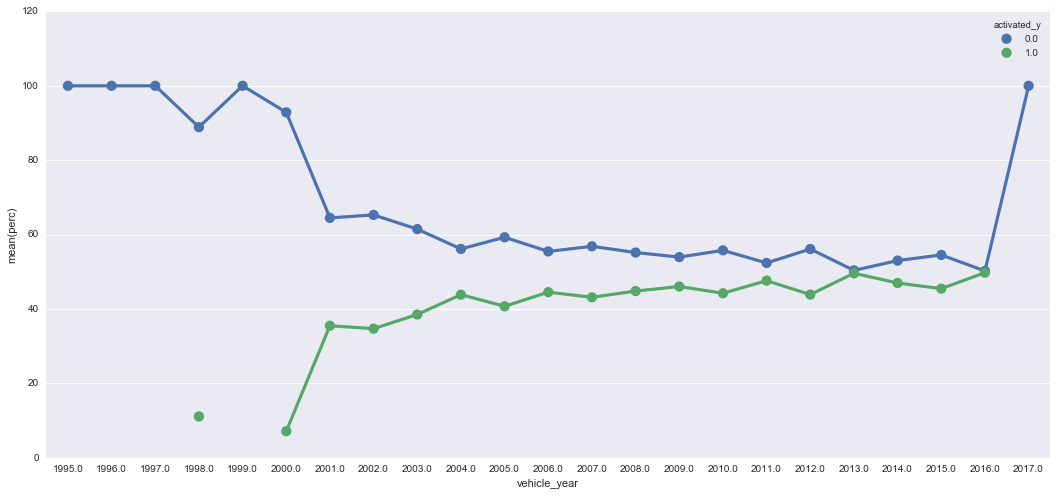

In [101]:
plt.figure(figsize=(18,8))
sns.pointplot(x="vehicle_year", y="perc", hue="activated_y", data=df_vehicle_year_activated_per);

# Findings:

    As the vehicle year is relatively new the ativation rates are better

# Dummy Varibles

In [102]:
df.columns

Index(['id', 'city_name', 'signup_os', 'signup_channel', 'signup_date',
       'bgc_date', 'vehicle_added_date', 'vehicle_make', 'vehicle_model',
       'vehicle_year', 'first_completed_date', 'activated_y'],
      dtype='object')

categoricals = ['city_name','signup_os','signup_channel','vehicle_make','vehicle_model','vehicle_year']
target = 'activated_y'

In [103]:
#categoricals = ['city_name', 'signup_os', 'signup_channel', 'vehicle_make', 'vehicle_model','vehicle_year'] 
categoricals = ['city_name', 'signup_os', 'signup_channel', 'vehicle_make','vehicle_year'] 
target = ['activated_y']

df['signup_os'].unique()

In [104]:
dummy_categoricals = []
for categorical in categoricals:
    print (categorical, len(df[categorical].unique()))
    drop_var = sorted(df[categorical].dropna().unique())[-1]
    temp_df = pd.get_dummies(df[categorical], prefix=categorical)
    df = pd.concat([df, temp_df], axis=1)
    temp_df.drop('_'.join([categorical, str(drop_var)]), axis=1, inplace=True)
    dummy_categoricals += temp_df.columns.tolist()

city_name 3
signup_os 6
signup_channel 3
vehicle_make 47
vehicle_year 25


In [105]:
len(dummy_categoricals)
df.columns

Index(['id', 'city_name', 'signup_os', 'signup_channel', 'signup_date',
       'bgc_date', 'vehicle_added_date', 'vehicle_make', 'vehicle_model',
       'vehicle_year', 'first_completed_date', 'activated_y',
       'city_name_Berton', 'city_name_Strark', 'city_name_Wrouver',
       'signup_os_android web', 'signup_os_ios web', 'signup_os_mac',
       'signup_os_other', 'signup_os_windows', 'signup_channel_Organic',
       'signup_channel_Paid', 'signup_channel_Referral', 'vehicle_make_Acura',
       'vehicle_make_Audi', 'vehicle_make_Autobot', 'vehicle_make_BMW',
       'vehicle_make_Bentley', 'vehicle_make_Bicycle', 'vehicle_make_Bike',
       'vehicle_make_Buick', 'vehicle_make_Cadillac', 'vehicle_make_Chevrolet',
       'vehicle_make_Chrysler', 'vehicle_make_Dodge', 'vehicle_make_Fiat',
       'vehicle_make_Ford', 'vehicle_make_GMC', 'vehicle_make_Honda',
       'vehicle_make_Hummer', 'vehicle_make_Hyundai', 'vehicle_make_Infiniti',
       'vehicle_make_Isuzu', 'vehicle_make_Jaguar'

# Model Building

In [106]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
train, test = train_test_split(df, test_size=0.4)

# Random forest

In [107]:
rf = RandomForestClassifier(n_estimators=50, oob_score=True)
rf.fit(train[dummy_categoricals], train[target].values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [108]:
predicted = rf.predict(test[dummy_categoricals])

In [109]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(test[target], predicted, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.93      0.94      0.93     19322
    class 1       0.47      0.43      0.45      2449

avg / total       0.88      0.88      0.88     21771



In [69]:
rf_importances = pd.DataFrame({'name':train[dummy_categoricals].columns,
                               'importance':rf.feature_importances_
                              }).sort_values(by='importance', ascending=False).reset_index(drop=True)
rf_importances.head(20)

,importance,name
0,0.064774,vehicle_make_Toyota
1,0.046587,vehicle_year_2015.0
2,0.036611,signup_channel_Paid
3,0.036540,signup_os_ios web
4,0.035506,signup_channel_Organic
5,0.033014,vehicle_year_2013.0
6,0.031982,vehicle_make_Honda
7,0.031446,vehicle_year_2014.0
8,0.031166,signup_os_android web
9,0.028781,city_name_Strark


# gradient boosting classifier

In [236]:
params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5,'learning_rate': 0.1, 'subsample': 0.5}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(train[dummy_categoricals], train[target].values.ravel())

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=None, max_features=None, max_leaf_nodes=4,
              min_samples_leaf=1, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=2, subsample=0.5, verbose=0,
              warm_start=False)

In [244]:
predicted_clf = clf.predict(test[dummy_categoricals])

In [245]:
target_names = ['class 0', 'class 1']
print(classification_report(test[target], predicted_clf, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.92      0.95      0.94     19328
    class 1       0.50      0.36      0.42      2443

avg / total       0.87      0.89      0.88     21771



In [239]:
clf_importances = pd.DataFrame({'name':train[dummy_categoricals].columns,
                               'importance':clf.feature_importances_
                              }).sort_values(by='importance', ascending=False).reset_index(drop=True)
clf_importances.head(20)

,importance,name
0,0.023096,vehicle_year_2014.0
1,0.022669,vehicle_year_2015.0
2,0.020993,vehicle_year_2013.0
3,0.018081,vehicle_year_2010.0
4,0.017580,vehicle_year_2011.0
5,0.017567,vehicle_year_2016.0
6,0.017439,vehicle_year_2012.0
7,0.014932,signup_channel_Organic
8,0.014828,vehicle_year_2008.0
9,0.014639,vehicle_year_2007.0


# Lasso regression 

In [110]:
from sklearn.linear_model import LogisticRegression
C = 1.0
lr = LogisticRegression(C=C, penalty='l1').fit(train[dummy_categoricals], train[target].values.ravel())
predicted_lr = lr.predict(test[dummy_categoricals])
print(classification_report(test[target], predicted_lr, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.92      0.96      0.94     19322
    class 1       0.53      0.38      0.44      2449

avg / total       0.88      0.89      0.88     21771



In [111]:
C = 1.0
lr = LogisticRegression(C=C, penalty='l2').fit(train[dummy_categoricals], train[target].values.ravel())
predicted_lr = lr.predict(test[dummy_categoricals])
print(classification_report(test[target], predicted_lr, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.92      0.96      0.94     19322
    class 1       0.53      0.38      0.45      2449

avg / total       0.88      0.89      0.89     21771



In [258]:
from sklearn import svm
X = train[ dummy_categoricals]
y = train[target].values.ravel()

C = 1.0

svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

In [259]:
predicted_svc = svc.predict(test[dummy_categoricals])
print(classification_report(test[target], predicted_svc, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.91      0.96      0.94     19328
    class 1       0.48      0.26      0.34      2443

avg / total       0.86      0.89      0.87     21771



In [260]:
predicted_rbfsvc = rbf_svc.predict(test[dummy_categoricals])
print(classification_report(test[target], predicted_rbfsvc, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.92      0.96      0.94     19328
    class 1       0.49      0.35      0.41      2443

avg / total       0.87      0.89      0.88     21771



In [261]:
predicted_polysvc = poly_svc.predict(test[dummy_categoricals])
print(classification_report(test[target], predicted_polysvc, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.89      1.00      0.94     19328
    class 1       0.00      0.00      0.00      2443

avg / total       0.79      0.89      0.84     21771



C:\Users\krish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [263]:
predicted_lsvc = lin_svc.predict(test[dummy_categoricals])
print(classification_report(test[target], predicted_lsvc, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.92      0.96      0.94     19328
    class 1       0.51      0.36      0.42      2443

avg / total       0.88      0.89      0.88     21771



# Findings

1. Newer model vehicles have better activation rates
2. Vehicle_make: toyota & honda & nissan have better activation rates
3. Signup_channel: referral has better activation rate
